In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.api import OLS
import matplotlib.pyplot as plt

In [3]:
CSAN_df = pd.read_excel('CSAN3.xlsx', sheet_name= "normal")
CSAN_df['Data'] = pd.to_datetime(CSAN_df['Data'])
CSAN_df['CSAN_diff'] = CSAN_df['CSAN'].diff()
CSAN_df = CSAN_df.dropna()
CSAN_df

,Data,CSAN,LN_CSAN,LN_DIFF_CSAN,CSAN_diff
1,2011-02-28,4.887358,1.586652,-0.011453,-0.056296
2,2011-03-31,3.995276,1.385113,-0.201539,-0.892082
3,2011-04-29,3.865171,1.352006,-0.033107,-0.130105
4,2011-05-31,3.798652,1.334646,-0.017360,-0.066519
5,2011-06-30,3.869435,1.353108,0.018462,0.070782
...,...,...,...,...,...
154,2023-11-30,17.750000,2.876386,0.119545,2.000000
155,2023-12-28,19.360000,2.963209,0.086824,1.610000
156,2024-01-31,18.270000,2.905260,-0.057949,-1.090000
157,2024-02-29,17.000000,2.833213,-0.072047,-1.270000


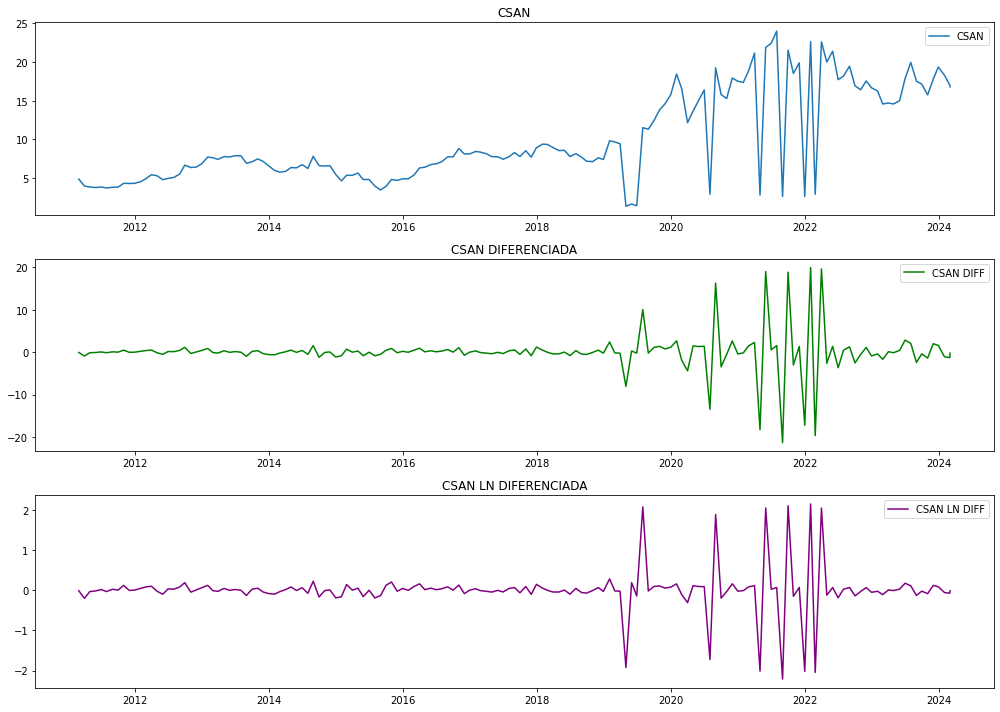

In [4]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(CSAN_df['Data'] , CSAN_df['CSAN'], label='CSAN')
plt.title('CSAN')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(CSAN_df['Data'], CSAN_df['CSAN_diff'], label='CSAN DIFF', color='green')
plt.title('CSAN DIFERENCIADA')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(CSAN_df['Data'] ,CSAN_df['LN_DIFF_CSAN'], label='CSAN LN DIFF', color='purple')
plt.title('CSAN LN DIFERENCIADA')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# Function to perform the ADF test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
# Apply the ADF test on each series
print("CSAN:")
adf_test(CSAN_df['CSAN'])

print("\nCSAN DIFF:")
adf_test(CSAN_df['CSAN_diff'])

print("\nCSAN LN:")
adf_test(CSAN_df['LN_CSAN'])

print("\nCSAN LN DIFF:")
adf_test(CSAN_df['LN_DIFF_CSAN'])

CSAN:
Results of Dickey-Fuller Test:
Test Statistic                  -0.411368
p-value                          0.908183
#Lags Used                      12.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64

CSAN DIFF:
Results of Dickey-Fuller Test:
Test Statistic                -5.728321e+00
p-value                        6.690483e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.460000e+02
Critical Value (1%)           -3.475953e+00
Critical Value (5%)           -2.881548e+00
Critical Value (10%)          -2.577439e+00
dtype: float64

CSAN LN:
Results of Dickey-Fuller Test:
Test Statistic                  -1.122795
p-value                          0.705897
#Lags Used                      12.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.88

In [6]:
print(CSAN_df.info())
print(CSAN_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          158 non-null    datetime64[ns]
 1   CSAN          158 non-null    float64       
 2   LN_CSAN       158 non-null    float64       
 3   LN_DIFF_CSAN  158 non-null    float64       
 4   CSAN_diff     158 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB
None
             CSAN     LN_CSAN  LN_DIFF_CSAN   CSAN_diff
count  158.000000  158.000000    158.000000  158.000000
mean     9.913997    2.121295      0.007738    0.074977
std      5.746744    0.606714      0.566486    4.903261
min      1.384682    0.325470     -2.209062  -21.343579
25%      5.497295    1.704246     -0.045646   -0.411202
50%      7.765874    2.049739      0.001730    0.009792
75%     15.205394    2.721620      0.070340    0.510902
max     23.976258    3.177064     

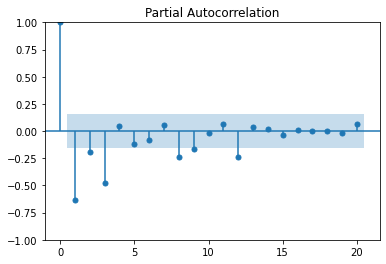

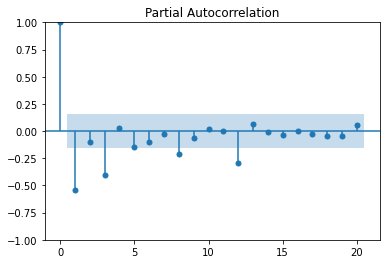

In [7]:
#PACF
#PACF
ploct =plot_pacf(CSAN_df['CSAN_diff'], lags=20, alpha=0.05) # 4 defasagens
ploct =plot_pacf(CSAN_df['LN_DIFF_CSAN'], lags=20, alpha=0.05) # 4 defasagens

In [8]:
indicadores = pd.read_excel('indicadores.xlsx', sheet_name= "normal")
indicadores['Data'] = pd.to_datetime(indicadores['Data'])
indicadores
indicadores['CAMBIO_diff'] = indicadores['CAMBIO'].diff()
indicadores['IBC-BR_diff'] = indicadores['IBC-BR'].diff()



#criando um dataframe com as variáveis que serão utilizadas
new_df = indicadores.loc[:, ['Data','IPCA', 'CAMBIO_diff', 'IBC-BR_diff', 'SELIC', 'IGP-M', 'DUMMY']]
new_df = new_df.dropna()
#new_df

#juntando um new_df com o  SBSP_df
df = pd.merge(CSAN_df, new_df, on='Data')
df

,Data,CSAN,LN_CSAN,LN_DIFF_CSAN,CSAN_diff,IPCA,CAMBIO_diff,IBC-BR_diff,SELIC,IGP-M,DUMMY
0,2011-02-28,4.887358,1.586652,-0.011453,-0.056296,0.80,0.00,3.52,0.843905,1.00,0
1,2011-03-31,3.995276,1.385113,-0.201539,-0.892082,0.79,-0.01,8.75,0.920465,0.62,0
2,2011-04-29,3.865171,1.352006,-0.033107,-0.130105,0.77,-0.07,-5.04,0.840161,0.45,0
3,2011-05-31,3.798652,1.334646,-0.017360,-0.066519,0.47,0.02,3.34,0.987988,0.43,0
4,2011-06-30,3.869435,1.353108,0.018462,0.070782,0.15,-0.02,-1.48,0.956276,-0.18,0
...,...,...,...,...,...,...,...,...,...,...,...
152,2023-10-31,15.750000,2.756840,-0.084575,-1.390000,0.24,0.12,0.17,0.997572,0.50,0
153,2023-11-30,17.750000,2.876386,0.119545,2.000000,0.28,-0.16,-0.74,0.915991,0.59,0
154,2023-12-28,19.360000,2.963209,0.086824,1.610000,0.56,0.00,-0.23,0.894529,0.74,0
155,2024-01-31,18.270000,2.905260,-0.057949,-1.090000,0.42,0.01,-3.59,0.966696,0.07,0


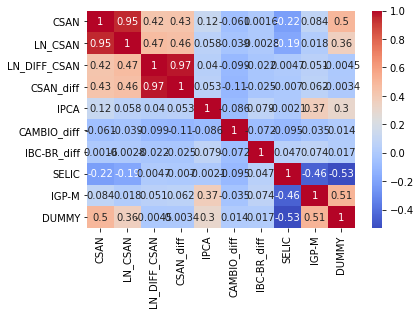

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

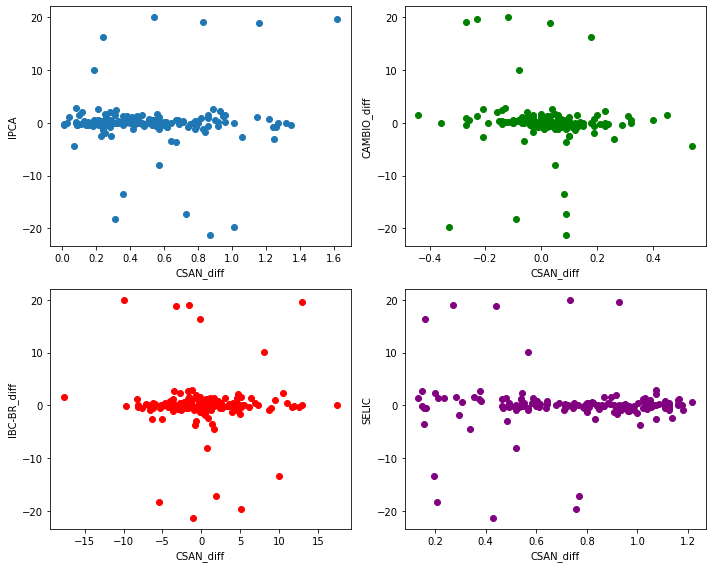

In [10]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot 1
axes[0, 0].scatter( df['IPCA'], df['CSAN_diff'])
axes[0, 0].set_xlabel('CSAN_diff')
axes[0, 0].set_ylabel('IPCA')

# Scatter plot 2
axes[0, 1].scatter( df['CAMBIO_diff'], df['CSAN_diff'], color='green')
axes[0, 1].set_xlabel('CSAN_diff')
axes[0, 1].set_ylabel('CAMBIO_diff')

# Scatter plot 3
axes[1, 0].scatter(df['IBC-BR_diff'] , df['CSAN_diff'], color='red')
axes[1, 0].set_xlabel('CSAN_diff')
axes[1, 0].set_ylabel('IBC-BR_diff')

# Scatter plot 4
axes[1, 1].scatter( df['SELIC'], df['CSAN_diff'], color='purple')
axes[1, 1].set_xlabel('CSAN_diff')
axes[1, 1].set_ylabel('SELIC')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

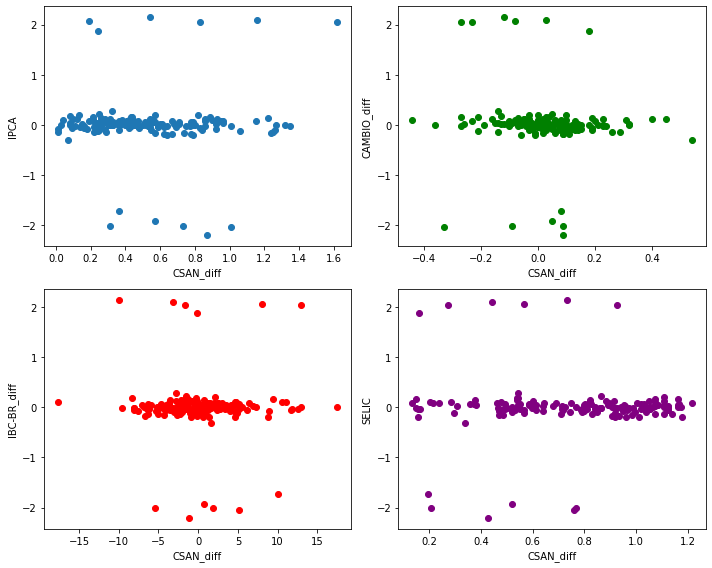

In [11]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot 1
axes[0, 0].scatter( df['IPCA'], df['LN_DIFF_CSAN'])
axes[0, 0].set_xlabel('CSAN_diff')
axes[0, 0].set_ylabel('IPCA')

# Scatter plot 2
axes[0, 1].scatter( df['CAMBIO_diff'], df['LN_DIFF_CSAN'], color='green')
axes[0, 1].set_xlabel('CSAN_diff')
axes[0, 1].set_ylabel('CAMBIO_diff')

# Scatter plot 3
axes[1, 0].scatter(df['IBC-BR_diff'] , df['LN_DIFF_CSAN'], color='red')
axes[1, 0].set_xlabel('CSAN_diff')
axes[1, 0].set_ylabel('IBC-BR_diff')

# Scatter plot 4
axes[1, 1].scatter( df['SELIC'], df['LN_DIFF_CSAN'], color='purple')
axes[1, 1].set_xlabel('CSAN_diff')
axes[1, 1].set_ylabel('SELIC')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

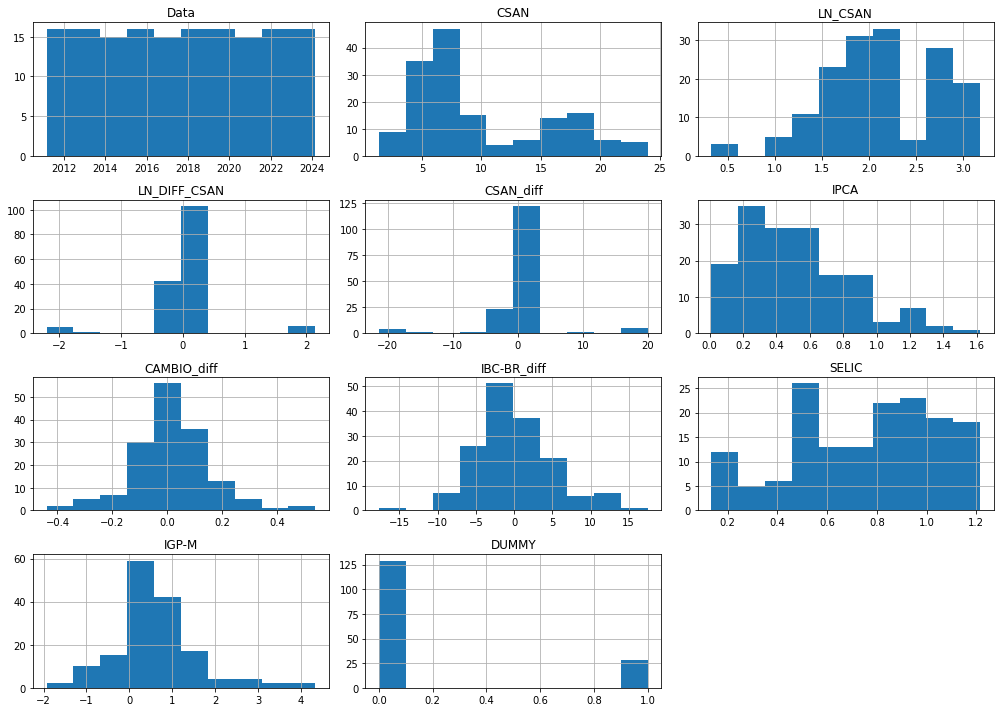

In [12]:
#histogram of the variables
df.hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

In [13]:
import statsmodels.api as sm

# Define the independent variables
X = df[['IPCA',  'IBC-BR_diff', 'IGP-M', 'CAMBIO_diff', 'SELIC','DUMMY']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df['LN_DIFF_CSAN']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           LN_DIFF_CSAN   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.3737
Date:                Fri, 21 Jun 2024   Prob (F-statistic):              0.895
Time:                        16:34:29   Log-Likelihood:                -132.38
No. Observations:                 157   AIC:                             278.8
Df Residuals:                     150   BIC:                             300.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0258      0.177     -0.146      

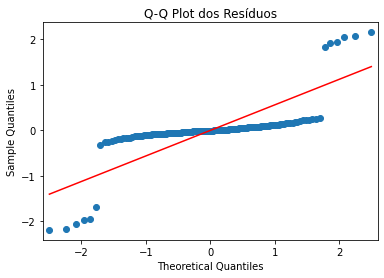

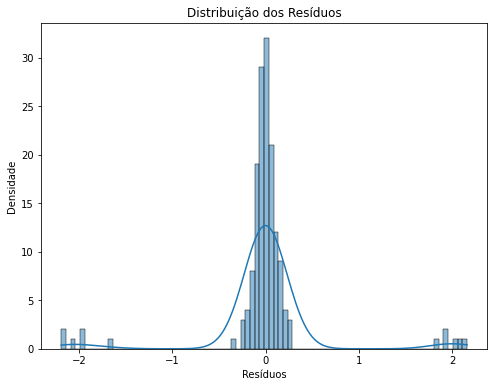

In [14]:
import statsmodels.api as sm# Get the residuals

from statsmodels.graphics.gofplots import qqplot
residuals = model.resid
#qq plot indica se os resíduos são normais quanto mais próximo da linha diagonal
qqplot(residuals, line='s') 
plt.title('Q-Q Plot dos Resíduos')
plt.show()

#histograma para poder visualizar a normalidade melhor
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

In [15]:
def backward_stepwise_selection(X, y, significance_level=0.10, protected_var='DUMMY'):
    initial_features = X.columns.tolist()
    if protected_var and protected_var in initial_features:
        initial_features.remove(protected_var)
    
    while len(initial_features) > 0:
        model = sm.OLS(y, X[[protected_var] + initial_features]).fit()
        p_values = model.pvalues.loc[initial_features]  # Ignorar a constante e a variável protegida
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            initial_features.remove(excluded_feature)
            print(f'Removed feature: {excluded_feature}, p-value: {max_p_value}')
        else:
            break
    return model

In [16]:
# Define the independent variables
X = df[['IPCA', 'CAMBIO_diff', 'IBC-BR_diff', 'SELIC','DUMMY']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df['LN_DIFF_CSAN']

# Executar a seleção de variáveis
final_model = backward_stepwise_selection(X, y)

# Imprimir o sumário final
print(final_model.summary())

Removed feature: const, p-value: 0.9635579609608247
Removed feature: SELIC, p-value: 0.8162114577661598
Removed feature: IBC-BR_diff, p-value: 0.7035727608967803
Removed feature: IPCA, p-value: 0.6016123704664864
Removed feature: CAMBIO_diff, p-value: 0.230174013864755
                                 OLS Regression Results                                
Dep. Variable:           LN_DIFF_CSAN   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.7258
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                       0.486
Time:                        16:34:30   Log-Likelihood:                         -132.83
No. Observations:                 157   AIC:                                      269.7
Df Residuals:                     155   BIC:                                      275.8
Df Model:                 

## Tratamento de outlier:

In [17]:
df = df.drop(columns=['Data'])
def remove_outliers(df, lower_quantile=0.05, upper_quantile=0.95):
    """
    Remove outliers de um DataFrame utilizando quantis.

    :param df: DataFrame de entrada.
    :param lower_quantile: Limite inferior dos quantis (default: 0.05).
    :param upper_quantile: Limite superior dos quantis (default: 0.95).
    :return: DataFrame sem outliers.
    """
    # Calcula os quantis inferior e superior para cada coluna
    quantiles = df.quantile([lower_quantile, upper_quantile])
    
    # Inicializa uma máscara booleana para todos os valores serem verdadeiros
    mask = pd.Series([True] * len(df))
    
    for col in df.columns:
        # Gera uma máscara para cada coluna, considerando os quantis
        col_mask = (df[col] >= quantiles.loc[lower_quantile, col]) & (df[col] <= quantiles.loc[upper_quantile, col])
        # Combina as máscaras
        mask &= col_mask
    
    # Retorna o DataFrame sem os outliers
    return df[mask]

# Exemplo de uso
# df = pd.read_csv('seu_arquivo.csv')  # Carregar seu DataFrame aqui
# df_sem_outliers = remove_outliers(df)

df_sem_outliers = remove_outliers(df)
df_sem_outliers

,CSAN,LN_CSAN,LN_DIFF_CSAN,CSAN_diff,IPCA,CAMBIO_diff,IBC-BR_diff,SELIC,IGP-M,DUMMY
0,4.887358,1.586652,-0.011453,-0.056296,0.80,0.00,3.52,0.843905,1.00,0
2,3.865171,1.352006,-0.033107,-0.130105,0.77,-0.07,-5.04,0.840161,0.45,0
3,3.798652,1.334646,-0.017360,-0.066519,0.47,0.02,3.34,0.987988,0.43,0
4,3.869435,1.353108,0.018462,0.070782,0.15,-0.02,-1.48,0.956276,-0.18,0
5,3.743600,1.320048,-0.033061,-0.125835,0.16,-0.03,3.44,0.967883,-0.12,0
...,...,...,...,...,...,...,...,...,...,...
152,15.750000,2.756840,-0.084575,-1.390000,0.24,0.12,0.17,0.997572,0.50,0
153,17.750000,2.876386,0.119545,2.000000,0.28,-0.16,-0.74,0.915991,0.59,0
154,19.360000,2.963209,0.086824,1.610000,0.56,0.00,-0.23,0.894529,0.74,0
155,18.270000,2.905260,-0.057949,-1.090000,0.42,0.01,-3.59,0.966696,0.07,0


In [23]:
import statsmodels.api as sm

# Define the independent variables
X = df_sem_outliers[['IPCA', 'CAMBIO_diff', 'SELIC', 'DUMMY']]
#X = df_sem_outliers[[ 'CAMBIO_diff',  'DUMMY', 'IBC-BR_diff']]
# Add a constant column to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df_sem_outliers['LN_DIFF_CSAN']

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           LN_DIFF_CSAN   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     4.596
Date:                Fri, 21 Jun 2024   Prob (F-statistic):            0.00213
Time:                        16:35:33   Log-Likelihood:                 111.58
No. Observations:                  87   AIC:                            -213.2
Df Residuals:                      82   BIC:                            -200.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0769      0.035      2.227      

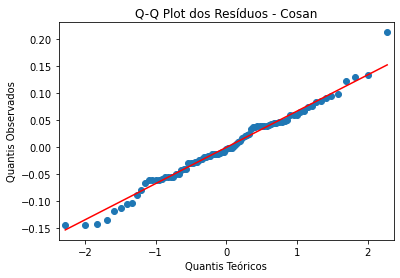

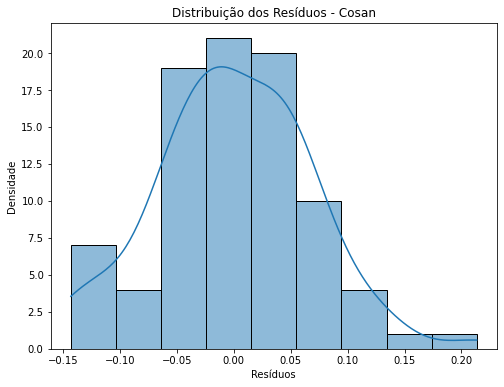

In [24]:

from statsmodels.graphics.gofplots import qqplot
residuals = results.resid
#qq plot indica se os resíduos são normais quanto mais próximo da linha diagonal
qqplot(residuals, line='s') 
plt.title('Q-Q Plot dos Resíduos - Cosan')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')
plt.show()

#histograma para poder visualizar a normalidade melhor
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos - Cosan')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

In [26]:
predictions = model.predict(X)

# Plotar Valores Observados vs. Previstos
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Previstos')
plt.title('Valores Observados vs. Previstos')
plt.show()

ValueError: shapes (87,5) and (87,5) not aligned: 5 (dim 1) != 87 (dim 0)

In [25]:
# Calculate VIF for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       feature        VIF
0        const  21.716003
1         IPCA   1.184464
2  CAMBIO_diff   1.245112
3        SELIC   1.154674
4        DUMMY   1.148133


Tirando o IBCBR e IPCA:

In [21]:
# Define the independent variables
X = df_sem_outliers[[ 'CAMBIO_diff', 'SELIC', 'DUMMY']]
#X = df_sem_outliers[[ 'CAMBIO_diff',  'DUMMY', 'IBC-BR_diff']]
# Add a constant column to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df_sem_outliers['LN_DIFF_CSAN']

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           LN_DIFF_CSAN   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     5.791
Date:                Fri, 21 Jun 2024   Prob (F-statistic):            0.00121
Time:                        16:34:30   Log-Likelihood:                 111.05
No. Observations:                  87   AIC:                            -214.1
Df Residuals:                      83   BIC:                            -204.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0623      0.031      1.989      

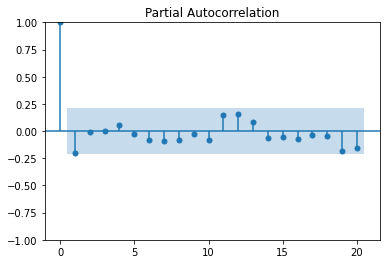

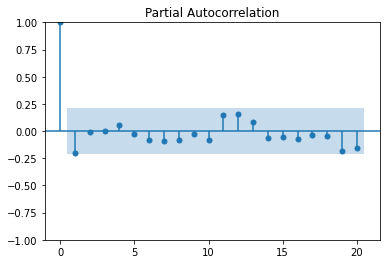

In [22]:
plot_pacf(df_sem_outliers['LN_DIFF_CSAN'], lags=20, alpha=0.05)